In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("TraningInputFile.csv")

In [3]:
df

,capshape,capsurface,capcolor,bruises%3F,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   capshape               8124 non-null   object
 1   capsurface             8124 non-null   object
 2   capcolor               8124 non-null   object
 3   bruises%3F             8124 non-null   object
 4   odor                   8124 non-null   object
 5   gillattachment         8124 non-null   object
 6   gillspacing            8124 non-null   object
 7   gillsize               8124 non-null   object
 8   gillcolor              8124 non-null   object
 9   stalkshape             8124 non-null   object
 10  stalkroot              8124 non-null   object
 11  stalksurfaceabovering  8124 non-null   object
 12  stalksurfacebelowring  8124 non-null   object
 13  stalkcolorabovering    8124 non-null   object
 14  stalkcolorbelowring    8124 non-null   object
 15  veiltype             

In [29]:
from pandas_profiling import ProfileReport
ProfileReport(df).to_file("Training_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.drop(columns=["veiltype"], inplace=True)

In [6]:
for column in df.columns:
    count = df[column][df[column] == "?"].count()
    if count != 0:
        df[column] = df[column].replace("?",np.nan)

In [9]:
df.isnull().sum()

capshape                 0
capsurface               0
capcolor                 0
bruises%3F               0
odor                     0
gillattachment           0
gillspacing              0
gillsize                 0
gillcolor                0
stalkshape               0
stalkroot                0
stalksurfaceabovering    0
stalksurfacebelowring    0
stalkcolorabovering      0
stalkcolorbelowring      0
veilcolor                0
ringnumber               0
ringtype                 0
sporeprintcolor          0
population               0
habitat                  0
class                    0
dtype: int64

In [8]:
df["stalkroot"].fillna(df["stalkroot"].mode()[0],inplace=True)

In [10]:
df["class"] = df["class"].map({"p":1, "e":2})
for column in df.drop(columns=["class"]).columns:
    df = pd.get_dummies(df, columns=[column])

In [11]:
df

,class,capshape_b,capshape_c,capshape_f,capshape_k,capshape_s,capshape_x,capsurface_f,capsurface_g,capsurface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,2,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [12]:
X = df.drop(columns=["class"])
y = df["class"]

In [13]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

Text(0, 0.5, 'WCSS')

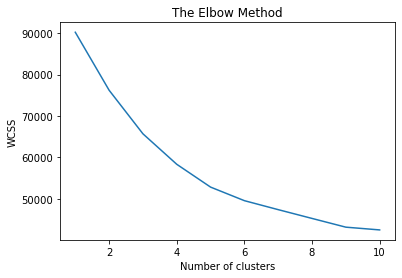

In [14]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0) 
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [15]:
number_of_clusters = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing").knee
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
X["Clusters"] = kmeans.fit_predict(X)
X["Labels"] = y

In [16]:
def get_best_params_for_randomForest(X_train, y_train):
    grid_params = {
        "n_estimators": [10, 50, 100, 130], 
        "criterion": ['gini', 'entropy'],
        "max_depth": range(2, 4, 1), 
        "max_features": ['auto', 'log2']
    }
    grid = GridSearchCV(RandomForestClassifier(),param_grid=grid_params, n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    max_features = grid.best_params_['max_features']
    n_estimators = grid.best_params_['n_estimators']
    randomForest = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_features=max_features)
    randomForest.fit(X_train, y_train)
    return randomForest

In [17]:
def get_best_params_for_knn(X_train, y_train):
    grid_params = {
        'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
        'leaf_size' : [10,17,24,28,30,35],
        'n_neighbors':[4,5,8,10,11],
        'p':[1,2]
    }
    grid = GridSearchCV(KNeighborsClassifier(), n_jobs=-1, cv=5, param_grid=grid_params)
    grid.fit(X_train, y_train)
    algorithm = grid.best_params_['algorithm']
    leaf_size = grid.best_params_['leaf_size']
    n_neighbors = grid.best_params_['n_neighbors']
    p  = grid.best_params_['p']
    knn = KNeighborsClassifier(algorithm=algorithm, leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
    knn.fit(X_train, y_train)
    return knn

In [18]:
def get_best_model(X_train, X_test, y_train, y_test):
    knn = get_best_params_for_knn(X_train, y_train)
    predict_knn = knn.predict(X_test)
    if len(y_test.unique()) ==1:
        knn_score = accuracy_score(y_test, predict_knn)
    else:
        knn_score = roc_auc_score(y_test, predict_knn)
    
    randomForest = get_best_params_for_randomForest(X_train, y_train)
    predict_randForest = randomForest.predict(X_test)
    if len(y_test.unique()) ==1:
        randomForest_score = accuracy_score(y_test, predict_randForest)
    else:
        randomForest_score = roc_auc_score(y_test, predict_randForest)
    
    if randomForest_score > knn_score:
        return "RandomForestClassifier", randomForest
    else:
        return "KNeighborsClassifier", knn


In [19]:
list_of_clusters = X["Clusters"].unique()
list_of_models = {}
for i in list_of_clusters:
    cluster_data = X[X["Clusters"] == i]
    cluster_features = cluster_data.drop(columns=["Clusters", "Labels"])
    cluster_label = cluster_data["Labels"]
    X_train, X_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=1/3, random_state=0)
    best_model_name, best_model = get_best_model(X_train, X_test, y_train, y_test)
    print(f"Cluster number {i + 1}: {best_model}")
    list_of_models[i] = best_model   

Cluster number 5: KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=4, p=1)
Cluster number 4: KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=4, p=1)
Cluster number 1: KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=4, p=1)
Cluster number 3: KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=4, p=1)
Cluster number 2: KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=4, p=1)


In [20]:
df = pd.read_csv("TestingInputFile.csv")

In [21]:
df

,capshape,capsurface,capcolor,bruises%3F,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [58]:
ProfileReport(df).to_file("Testing_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
df.drop(columns=["veiltype"], inplace=True)
for column in df.columns:
    count = df[column][df[column]=="?"].count()
    if count!=0:
        df[column] = df[column].replace("?", np.nan)

In [25]:
df.isnull().sum()

capshape                 0
capsurface               0
capcolor                 0
bruises%3F               0
odor                     0
gillattachment           0
gillspacing              0
gillsize                 0
gillcolor                0
stalkshape               0
stalkroot                0
stalksurfaceabovering    0
stalksurfacebelowring    0
stalkcolorabovering      0
stalkcolorbelowring      0
veilcolor                0
ringnumber               0
ringtype                 0
sporeprintcolor          0
population               0
habitat                  0
dtype: int64

In [24]:
df["stalkroot"].fillna(df["stalkroot"].mode()[0], inplace=True)

In [26]:
for column in df.columns:
    df = pd.get_dummies(df, columns=[column])

In [27]:
df

,capshape_b,capshape_c,capshape_f,capshape_k,capshape_s,capshape_x,capsurface_f,capsurface_g,capsurface_s,capsurface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [28]:
df["Clusters"] = kmeans.predict(df)
clusters = df["Clusters"].unique()

In [29]:
result = []
for i in clusters:
    cluster_data = df[df["Clusters"]==i]
    cluster_data = cluster_data.drop(columns=["Clusters"])
    model = list_of_models[i]
    for val in model.predict(cluster_data):
        result.append(val)
pd.DataFrame(result, columns=["Predictions"]).to_csv("Predictions.csv", header=True)    